---
title: "Optimization"
author: "Pablo Winant"
format:
    html: default
    ipynb: default
---

## Computational Economics  (MIE37)

In this tutorial you will learn to code and use common optimization algorithms for static models.


---

## Profit optimization by a monopolist

A monopolist produces quantity $q$ of goods X at price $p$. Its cost function is $c(q) = 0.5 + q (1-qe^{-q})$

The consumer's demand for price $p$ is $x(p)=2 e^{-0.5 p}$ (constant elasticity of demand to price).

__Write down the profit function of the monopolist and find the optimal production (if any). Don't use any library except for plotting.__



In [22]:
# c(q) = 2exp(-0.5q)
c(q) = 0.5 + q*(1-q*exp(-q))
p(q) = -2(log(q)-log(2))
π(q) = q*p(q) - c(q)

π (generic function with 1 method)

In [14]:
using Plots

In [23]:
qvec = range(0.0001,3; length=100)
# πvec = [π(e) for e in qvec]
πvec = π.(qvec);

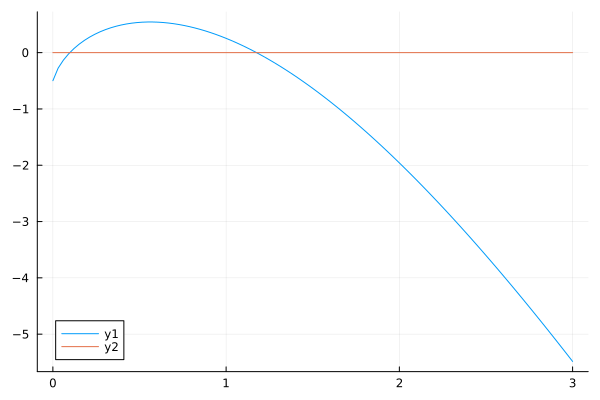

In [24]:
plot(qvec, πvec)
plot!(qvec, qvec*0)

In [30]:
function grid_search(f, a, b, N)
    # looks for the optimal on N+1 points grid
    i0 = -1 # keeps index of the optimal
    f0 = -10000
    for n = 1:N
        xi = a + (b-a)*(n-1)/(N-1)
        fi = f(xi)
        if fi>f0
            f0 = fi
            i0 = n
        end
    end

    η = (b-a)/N
    #return optimal x
    return a + (b-a)*(i0-1)/(N-1)
end

grid_search (generic function with 1 method)

In [32]:
res =  grid_search(π, 0.00001, 2, 10000)

0.5618633763376337

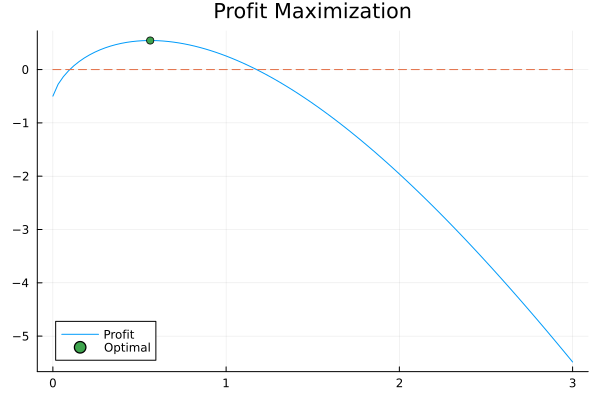

In [37]:
plot(qvec, πvec; label="Profit", title="Profit Maximization")
plot!(qvec, qvec*0; label="", linestyle=:dash)
scatter!([res], [π(res)]; label="Optimal")


In [6]:
fun(u) = 1-(u-1)^2

fun (generic function with 1 method)

In [7]:
grid_search(fun, -2, 2, 10000)

0.9998999899989998

In [10]:
findmax( [fun(e) for e in range(-2,2; length=1000)])

(0.999998997996996, 750)

In [ ]:
# # let's implement the grid search algorithm

# function bisection(f, a, b; η=1e-8, ϵ=1e-10)

#     N = log((b-a)/η)/log(2)

#     a0, b0 = a, b

#     for n=1:N

#         fa = f(a0)
#         fb = f(a0)

#         @assert fa*fb<=0

#         c = (a0 + b0)/2

#         fc = f(c)
#         if abs(fc)<ϵ
#             return c
#         end

#         if fc*fa<=0
#             # solution must be in [a0,c]
#             b0 = c
#         else
#             # solution must be in [c,b0]
#             a0 = c
#         end
        
#     end

#     error("No solution was found")

# end

bisection (generic function with 1 method)

---

## Constrained optimization

Consider the function $f(x,y) = 1-(x-0.5)^2 -(y-0.3)^2$.

__Use Optim.jl to maximize $f$ without constraint. Check you understand diagnostic information returned by the optimizer.__

In [3]:
using Optim

In [5]:
f(x,y) = 1-(x-0.5)^2 - (y-0.3)^2
# f(u) = f(u[1], u[2])
f(u::AbstractVector) = f(u...)

f (generic function with 3 methods)

In [7]:
res = Optim.optimize(
    u->-f(u),
    [0.1,0.3]
)

 * Status: success

 * Candidate solution
    Final objective value:     -1.000000e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    28
    f(x) calls:    58


In [11]:
res.minimizer # the solution

2-element Vector{Float64}:
 0.5000402081311677
 0.3000018404381079

In [15]:
res.x_converged

false

In [ ]:
fieldnames(typeof(res))

(:method, :initial_x, :minimizer, :minimum, :iterations, :iteration_converged, :x_converged, :x_abstol, :x_reltol, :x_abschange, :x_relchange, :f_converged, :f_abstol, :f_reltol, :f_abschange, :f_relchange, :g_converged, :g_abstol, :g_residual, :f_increased, :trace, :f_calls, :g_calls, :h_calls, :ls_success, :time_limit, :time_run, :stopped_by)

In [ ]:
using Plots
contour(
    range(0,1; length=100),
    range(0,1; length=100),
    f
)

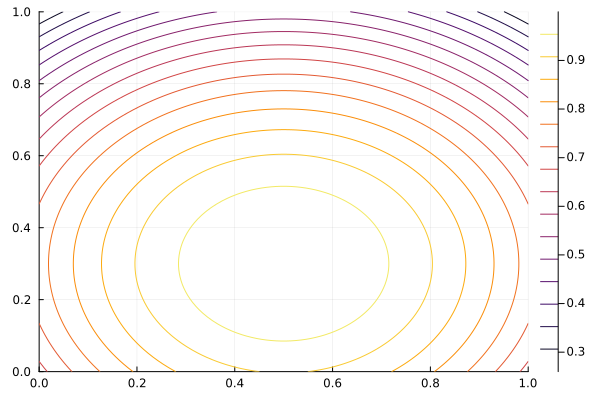

__Now, consider the constraint $x<0.3$ and maximize $f$ under this new constraint.__

In [19]:
# with a penalty function

κ = 100

φ(x) = x[1]<0.3 ? 0.0 : x[1]^2
# equivalaent to 
# if x[1]<0.3
#     0.0
# else
#     -x[1]^2

g(x) = f(x) - κ*φ(x)

g (generic function with 1 method)

In [20]:
res = Optim.optimize(
    u->-f(u) + κ*φ(u),
    [0.1,0.3]
)

 * Status: success

 * Candidate solution
    Final objective value:     -9.600000e-01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    69
    f(x) calls:    134


In [21]:
res.minimizer

2-element Vector{Float64}:
 0.2999999646891661
 0.3000426967172676

In [26]:
# with optim
res = Optim.optimize(
    u->-f(u), # objective
    [-Inf, -Inf], # lower bound
    [0.3, Inf], # upper bound
    [0.1,0.3], # initial guess
)



 * Status: success

 * Candidate solution
    Final objective value:     -9.600000e-01

 * Found with
    Algorithm:     Fminbox with L-BFGS

 * Convergence measures
    |x - x'|               = 4.00e-07 ≰ 0.0e+00
    |x - x'|/|x'|          = 9.42e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 4.00e-10 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    3
    f(x) calls:    45
    ∇f(x) calls:   45


In [25]:
res.minimizer

2-element Vector{Float64}:
 0.29999999989879517
 0.30000000003791916

__Reformulate the problem as a root finding problem with lagrangians. Write the complementarity conditions.__

__Solve using NLSolve.jl__

---

## Consumption optimization

A consumer has preferences $U(c_1, c_2)$ over two consumption goods $c_1$ and $c_2$.

Given a budget $I$, consumer wants to maximize utility subject to the budget constraint $p_1 c_1 + p_2 c_2 \leq I$.

We choose a Stone-Geary specification where

$U(c_1, c_2)=\beta_1 \log(c_1-\gamma_1) + \beta_2 \log(c_2-\gamma_2)$

__Write the Karush-Kuhn-Tucker necessary conditions for the problem.__

__Verify the KKT conditions are sufficient for optimality.__

__Derive analytically the demand functions, and the shadow price.__

__Interpret this problem as a complementarity problem and solve it using NLSolve.__

__Produce some nice graphs with isoutility curves, the budget constraint and the optimal choice.__

